
# Plotting with Geoplot and GeoPandas

[Geoplot](https://residentmario.github.io/geoplot/index.html) is a Python
library providing a selection of easy-to-use geospatial visualizations. It is
built on top of the lower-level [CartoPy](http://scitools.org.uk/cartopy/),
covered in a separate section of this tutorial, and is designed to work with
GeoPandas input.

This example is a brief tour of the `geoplot` API. For more details on the
library refer to [its documentation](https://residentmario.github.io/geoplot/index.html).

First we'll load in the data using GeoPandas.

But first first, can you add a cell block below to use pip to install the `geoplot` package?


In [5]:
!pip install geoplot

In [6]:
import geopandas
import geodatasets
import geoplot

world = geopandas.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")
boroughs = geopandas.read_file(geoplot.datasets.get_path("nyc_boroughs"))
collisions = geopandas.read_file(geoplot.datasets.get_path("nyc_injurious_collisions"))

Plotting with Geoplot
=====================

We start out by replicating the basic GeoPandas world plot using Geoplot.



In [7]:
world

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,NaN,NaN,Unrecognized,NaN,NaN,NaN,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


AttributeError: 'MultiPolygon' object has no attribute 'exterior'

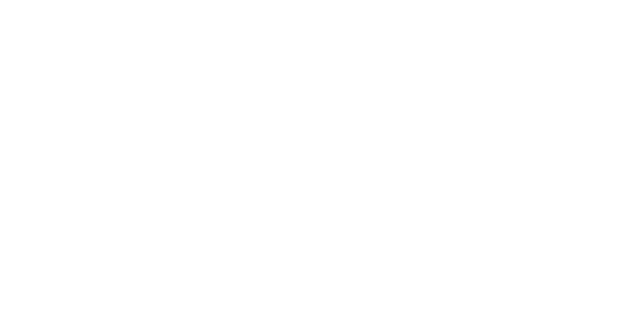

In [8]:
geoplot.polyplot(world, figsize=(8, 4))

Geoplot can re-project data into any of the map projections provided by
CartoPy (see the list
[here](http://scitools.org.uk/cartopy/docs/latest/crs/projections.html)).



/Users/colmanbashore/anaconda3/lib/python3.10/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/Users/colmanbashore/anaconda3/lib/python3.10/site-packages/geoplot/geoplot.py:703: UserWarning: Plot extent lies outside of the Orthographic projection's viewport. Defaulting to global extent.
  warnings.warn(


AttributeError: 'GeoAxes' object has no attribute 'outline_patch'

/Users/colmanbashore/anaconda3/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/colmanbashore/anaconda3/lib/python3.10/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/colmanbashore/anaconda3/lib/python3.10/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/Users/colmanbashore/anaconda3/lib/python3.10/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/colmanbashore/anaconda3/lib/python3.10/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/colmanbashore/anaconda3/lib/python3.10/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in di

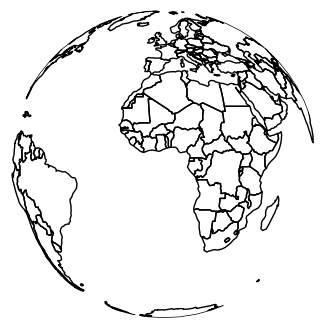

In [9]:
# use the Orthographic map projection (e.g. a world globe)
ax = geoplot.polyplot(world, projection=geoplot.crs.Orthographic(), figsize=(8, 4))
ax.outline_patch.set_visible(True)

``polyplot`` is trivial and can only plot the geometries you pass to it. If
you want to use color as a visual variable, specify a ``choropleth``. Here
we sort GDP per person by country into five buckets by color, using
"quantiles" binning from the [Mapclassify](https://pysal.org/mapclassify/)
library.



In [10]:
import mapclassify

gpd_per_person = world["gdp_md_est"] / world["pop_est"]
scheme = mapclassify.Quantiles(gpd_per_person, k=5)

# Note: this code sample requires geoplot>=0.4.0.
geoplot.choropleth(
    world, hue=gpd_per_person, scheme=scheme, cmap="Greens", figsize=(8, 4)
)

KeyError: 'gdp_md_est'

If you want to use size as a visual variable, use a ``cartogram``. Here are
population estimates for countries in Africa.



In [ ]:
africa = world.query('continent == "Africa"')
ax = geoplot.cartogram(
    africa, scale="pop_est", limits=(0.2, 1), edgecolor="None", figsize=(7, 8)
)
geoplot.polyplot(africa, edgecolor="gray", ax=ax)

If we have data in the shape of points in space, we may generate a
three-dimensional heatmap on it using ``kdeplot``.



In [ ]:
ax = geoplot.kdeplot(
    collisions.head(1000),
    clip=boroughs.geometry,
    shade=True,
    cmap="Reds",
    projection=geoplot.crs.AlbersEqualArea(),
)
geoplot.polyplot(boroughs, ax=ax, zorder=1)

These are just some of the plots you can make with Geoplot. There are
many other possibilities not covered in this brief introduction. For more
examples, refer to the
[Gallery](https://residentmario.github.io/geoplot/gallery/index.html) in
the Geoplot documentation.

